# Simple Sales Forecast with Moving Average - Beginner Level Task 2
CSV files in working directory:
- train.csv, transactions.csv, holidays_events.csv, oil.csv, sample_submission.csv, stores.csv, test.csv

##### This notebook covers:
- Computing rolling averages for weekly and monthly sales
- Comparing forecasts vs. actual sales
- Plotting trend lines for smoothed time series
- Practicing moving average forecasting concepts using Pandas


In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
sns.set(style='whitegrid')

# Load dataset
train = pd.read_csv('train.csv', parse_dates=['date'])
print('Train dataset loaded successfully!')
print('Shape:', train.shape)
# print(train.head()) sales = 0, raw data

# Aggregate daily total sales across all stores
daily_sales = train.groupby('date')['sales'].sum().reset_index()
daily_sales = daily_sales.sort_values('date')
print(daily_sales) # aggregrates all sales from all stores and families for each date

Train dataset loaded successfully!
Shape: (3000888, 6)
           date          sales
0    2013-01-01    2511.618999
1    2013-01-02  496092.417944
2    2013-01-03  361461.231124
3    2013-01-04  354459.677093
4    2013-01-05  477350.121229
...         ...            ...
1679 2017-08-11  826373.722022
1680 2017-08-12  792630.535079
1681 2017-08-13  865639.677471
1682 2017-08-14  760922.406081
1683 2017-08-15  762661.935939

[1684 rows x 2 columns]


### 1. Compute Rolling Averages
We'll calculate 7-day (weekly) and 30-day (monthly) moving averages for smoothing sales trends.

In [ ]:
# Compute moving averages
daily_sales['weekly_avg'] = daily_sales['sales'].rolling(window=7).mean()
daily_sales['monthly_avg'] = daily_sales['sales'].rolling(window=30).mean()

# Preview
daily_sales.head(10) 

,date,sales,weekly_avg,monthly_avg
0,2013-01-01,2511.618999,NaN,NaN
1,2013-01-02,496092.417944,NaN,NaN
2,2013-01-03,361461.231124,NaN,NaN
3,2013-01-04,354459.677093,NaN,NaN
4,2013-01-05,477350.121229,NaN,NaN
5,2013-01-06,519695.401088,NaN,NaN
6,2013-01-07,336122.801066,363956.181220,NaN
7,2013-01-08,318347.777981,409075.632504,NaN
8,2013-01-09,302530.809018,381423.974086,NaN
9,2013-01-10,258982.003049,366784.084361,NaN


### 2. Plot Sales with Moving Averages
We'll visualize raw sales, 7-day average, and 30-day average.

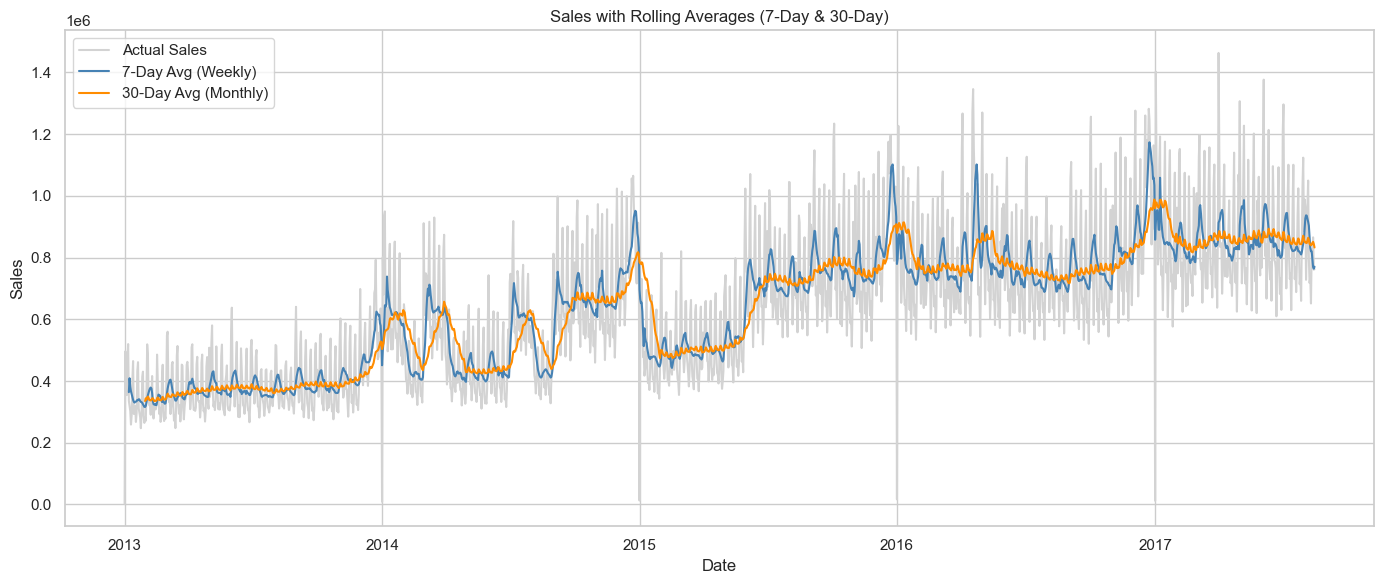

In [23]:
plt.figure(figsize=(14,6))
plt.plot(daily_sales['date'], daily_sales['sales'], label='Actual Sales', color='lightgray')
plt.plot(daily_sales['date'], daily_sales['weekly_avg'], label='7-Day Avg (Weekly)', color='steelblue')
plt.plot(daily_sales['date'], daily_sales['monthly_avg'], label='30-Day Avg (Monthly)', color='darkorange')
plt.title('Sales with Rolling Averages (7-Day & 30-Day)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

### 3. Compare Forecasts vs. Actual Sales
For simplicity, we'll treat the moving averages as basic forecasts and compare them with actual sales values.


In [6]:
# Drop NaN rows (first few days don't have enough past data for moving average)
comparison_df = daily_sales.dropna(subset=['weekly_avg', 'monthly_avg']).copy()

# Calculate simple error metrics
comparison_df['error_weekly'] = comparison_df['sales'] - comparison_df['weekly_avg']
comparison_df['error_monthly'] = comparison_df['sales'] - comparison_df['monthly_avg']

weekly_mae = comparison_df['error_weekly'].abs().mean()
monthly_mae = comparison_df['error_monthly'].abs().mean()

print(f'Mean Absolute Error (Weekly MA): {weekly_mae:.2f}')
print(f'Mean Absolute Error (Monthly MA): {monthly_mae:.2f}')

Mean Absolute Error (Weekly MA): 108963.87
Mean Absolute Error (Monthly MA): 115023.67


### 4. Plot Forecast Comparison
We'll overlay actual sales with weekly and monthly average forecasts to visualize performance.

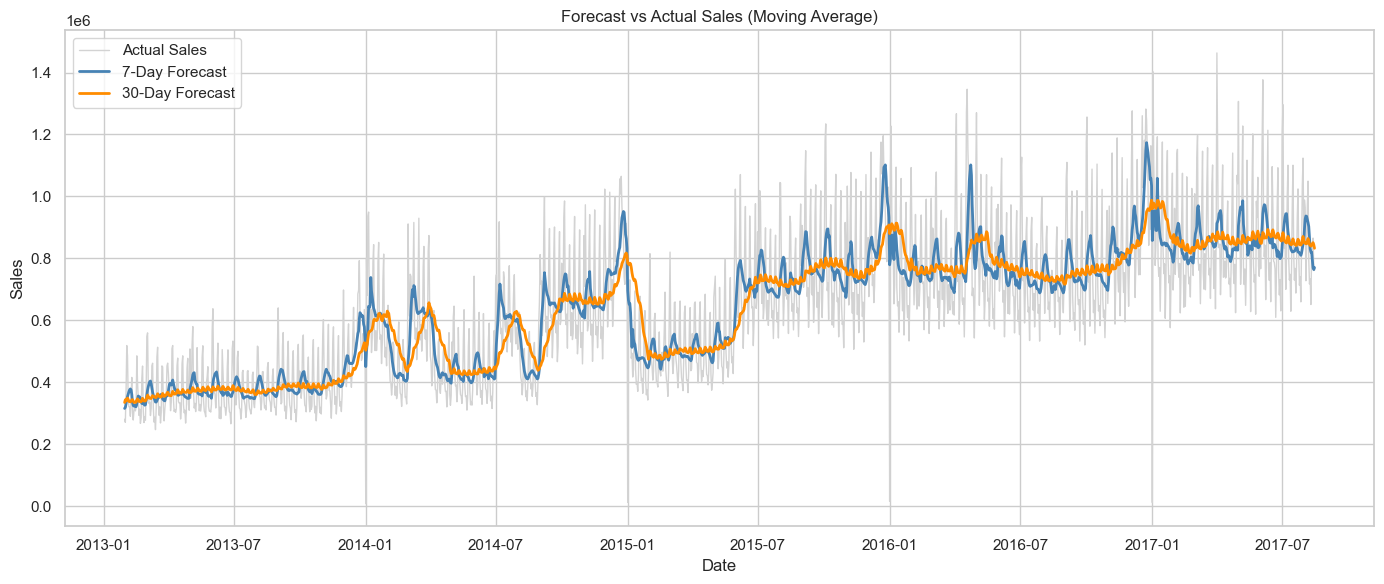

In [26]:
plt.figure(figsize=(14,6))
plt.plot(comparison_df['date'], comparison_df['sales'], label='Actual Sales', color='lightgray', linewidth=1)
plt.plot(comparison_df['date'], comparison_df['weekly_avg'], label='7-Day Forecast', color='steelblue', linewidth=2)
plt.plot(comparison_df['date'], comparison_df['monthly_avg'], label='30-Day Forecast', color='darkorange', linewidth=2)
plt.title('Forecast vs Actual Sales (Moving Average)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

### Summary
In this part, we:
- Computed 7-day and 30-day rolling averages for sales.
- Used them as simple forecasts and compared to actual sales.
- Plotted trend lines to visualize smoothing and forecasting performance. 
### Learning Outcomes:
- Understand time windows and rolling averages.
- Learn how moving averages can smooth noisy time series data.
- Compare simple forecasts vs. actual trends.

**Tech Stack:** Python, Pandas, Matplotlib, Seaborn.
**Dataset:** [Store Sales Time Series Forecasting](https://www.kaggle.com/competitions/store-sales-time-seriesforecasting)
